# Basic trading algorithm using indicators, on Brownian motion.

In [1]:
import matplotlib
from matplotlib import pyplot as plt

import random
import numpy as np
from talib import (SMA, RSI, MACD)

In [2]:
def buy_sell_strategy(prices):
    # Calculate the indicators
    sma = SMA(prices, timeperiod=14)
    rsi = RSI(prices, timeperiod=14)
    macd, macd_signal, macd_hist = MACD(prices)

    # Initialize buy and sell signals
    buy_signals, sell_signals = [], []

    # Iterate through the prices and indicators
    for i in range(len(prices)):
        # Buy signal: SMA is above prices, RSI is below 30, and MACD histogram is positive
        if sma[i] > prices[i] and rsi[i] < 30 and macd_hist[i] > 0:
            buy_signals.append(i)

        # Sell signal: SMA is below prices, RSI is above 70, and MACD histogram is negative
        if sma[i] < prices[i] and rsi[i] > 70 and macd_hist[i] < 0:
            sell_signals.append(i)

    return buy_signals, sell_signals

Profit calculator returns the profit/loss after each buy/sell cycle, the total profit/loss at time T and the portfolio value at time T by calculating the amount of holdings and multiplying by final value of the stock at time T. The buy and sell signals are printed at their respectives times based on relative strength indicator, simple moving average and macd histogram 

In [3]:
def profit_calculator():
    timestamped_profit=[]
    profit_loss=0
    for i in range(0,min(len(buy_signals),len(sell_signals))):
        profit_loss=profit_loss+(prices[sell_signals[i]]-prices[buy_signals[i]])
        timestamped_profit.append(profit_loss)
    
    return ('timestamped profit/loss' , timestamped_profit,
            'total profit/loss', profit_loss, 'portfolio value at T',
            (len(buy_signals)-len(sell_signals))*prices[N-1] )

## Brownian motion test case

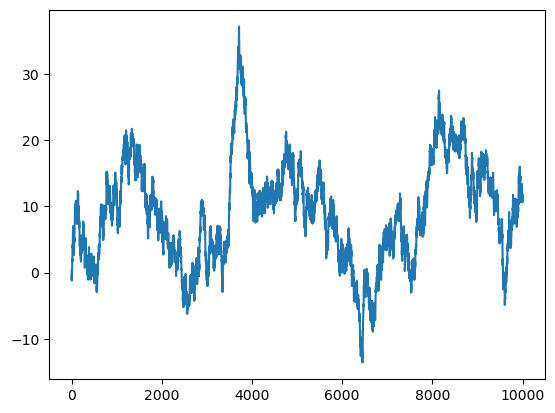

In [6]:
N = 10000
prices = np.cumsum(np.random.normal(0,0.5, size=N)) 
plt.plot(prices)
buy_signals, sell_signals = buy_sell_strategy(prices)

In [7]:
profit=[0]
print("Buy signals:", buy_signals)
print("Sell signals:", sell_signals)
print(profit_calculator())

Buy signals: [2455, 2981, 2985, 2986, 2992, 2994, 2995, 3008, 4959, 4962, 5165, 9575]
Sell signals: [34, 601, 2856, 3082, 3512, 3515, 3516, 3533, 3534, 3535, 3536, 3538, 3539, 3540, 3542, 3706, 5043, 6485, 6486, 6487, 6488, 6489, 6490, 6491, 6492, 6493, 6496, 6497, 6498, 8883, 9924, 9925, 9936]
('timestamped profit/loss', [8.908809573163294, 11.557364611079908, 18.627429535147026, 25.314320125906807, 37.816343223325504, 50.695516458635765, 65.54903466653225, 85.07398913350542, 94.52562714860802, 104.87710929168881, 116.53071039825831, 137.1261297804144], 'total profit/loss', 137.1261297804144, 'portfolio value at T', -234.52225592109326)
